# Índice de Contenidos

- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualización de relaciones](#Visualización-de-relaciones-entre-variables-numéricas-y-categóricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#Conclusiones-del-proceso-de-exploración-y-limpieza-de-datos)

# Conociendo al Cliente 360°: Datos, Opiniones y Tendencias. | **Avance 1**
Formas parte de un proceso de selección técnica para el rol de Científico de Datos Junior en InsightReach.

InsightReach es una empresa de marketing digital especializada en campañas personalizadas para negocios locales. Con el crecimiento de su base de clientes y la expansión a nuevos mercados, la empresa busca optimizar su estrategia de segmentación para mejorar la efectividad de sus campañas.

Como postulante, tu desafío es demostrar tu capacidad para analizar, enriquecer e interpretar bases de datos complejas para generar recomendaciones accionables. Tu rol simula el trabajo de un profesional en un entorno real, donde deberás construir análisis sólidos, justificar decisiones y comunicar resultados de manera clara y estructurada.

------

Comienzas el análisis con una base de datos provista por la empresa. Debes adoptar una mirada inquisitiva para detectar la calidad y estructura de los datos, y preparar el terreno para futuras integraciones. Tu papel es el de un científico de datos que inicia el pipeline analítico.

------

## Carga de datos

#### Carga y exploración inicial de la base de datos de clientes

El objetivo principal de esta sección es importar el DataFrame con el que se trabajará a lo largo del análisis. Se emplearán diferentes técnicas para explorar y comprender la estructura y características más relevantes de los datos, identificando posibles errores o inconsistencias que deban ser corregidos en etapas posteriores.

------

----------
- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualizacion de relaciones](#visualizacion-de-relaciones-entre-variables-numericas-y-categoricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#conclusiones-del-proceso-de-exploracion-y-limpieza-de-datos)
-------------

### Carga de las librerías esenciales para el análisis y limpieza de datos

En esta sección se importan las principales librerías que se utilizarán para la manipulación, análisis y visualización de los datos. Numpy y Pandas serán fundamentales para el procesamiento y transformación eficiente de la información. Además, se incluyen módulos adicionales para mejorar la visualización y funciones personalizadas que facilitan tareas repetitivas durante el análisis.

In [1]:
import pandas as pd # Manipulación de datos
import numpy as np # Operaciones matemáticas y estadísticas 
from IPython.display import display # Para mostrar DataFrames en Jupyter Notebook, aunque no es estrictamente necesario, es una buena práctica para visualizar los datos de manera más clara sin usar extensiones adicionales
from mega_funcion import imputar # Importamos la función imputar desde el archivo mega_funcion.py, que contiene la lógica para imputar valores en un DataFrame según diferentes criterios y operaciones 
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns # Visualización de datos avanzada

### Importación del DataFrame a trabajar

In [2]:
df_restaurante_original = pd.read_csv("base_datos_restaurantes_USA_v2.csv") # Como está alojado en la misma carpeta, no es necesario poner la ruta completa

df_res = df_restaurante_original.copy() # Copia del DataFrame original para evitar modificarlo directamente

### Comenzaremos conociendo la forma de nuestro DataFrame, es decir, cuántas filas y columnas contiene. Esto nos permite dimensionar el tamaño de los datos y tener una idea inicial del volumen de información con el que vamos a trabajar

In [3]:
print(f"El DataFrame tiene {df_res.shape[0]} filas y {df_res.shape[1]} columnas.") # 0 para filas, 1 para columnas

El DataFrame tiene 30000 filas y 17 columnas.


### Mostraremos las primeras 10 filas del DataFrame para obtener un vistazo general de los datos disponibles. Esto es fundamental para iniciar el análisis exploratorio preliminar y entender cómo están organizados los datos, así como identificar las principales columnas y su tipo de información

In [4]:
display(df_res.head(10)) # Muestra las primeras 10 filas del DataFrame

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31.0,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40.0,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62.0,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James,Shannon,41.0,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan,Jones,49.0,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350
5,1291749568,Donna,Davis,26.0,Femenino,Dallas,Alto,6,52.47,No,Sí,Carnes,Sí,976.606.6259x578,daniel28@example.com,Efectivo,8545
6,3592027247,Jason,Mcpherson,80.0,Masculino,NYC,Muy Alto,10,56.11,No,No,Vegano,Sí,001-327-542-1940x4789,bcastillo@example.org,Efectivo,10120
7,8373803828,Julie,Russo,66.0,Femenino,Boston,Muy Alto,9,19.94,No,Sí,Vegetariano,Sí,NaN,NaN,Efectivo,13456
8,7395628831,Mark,Hall,31.0,Masculino,NYC,Medio,5,16.17,No,Sí,Vegetariano,No,NaN,kara70@example.com,App,3350
9,5394273061,Sara,Ball,37.0,Femenino,Boston,Bajo,1,11.35,Sí,No,Carnes,No,563-346-4749x6591,smithstacy@example.com,Efectivo,1197


### Realizaremos un pequeño ciclo para listar el nombre y la cantidad total de columnas en nuestro DataFrame. Aunque en el punto anterior ya pudimos verlas junto con sus valores, observarlas de manera individual y numerada facilita tener presentes estas categorías para futuros análisis

In [5]:
for i, column in enumerate(df_res.columns, 1):
    print(f"{i} : {column}")

1 : id_persona
2 : nombre
3 : apellido
4 : edad
5 : genero
6 : ciudad_residencia
7 : estrato_socioeconomico
8 : frecuencia_visita
9 : promedio_gasto_comida
10 : ocio
11 : consume_licor
12 : preferencias_alimenticias
13 : membresia_premium
14 : telefono_contacto
15 : correo_electronico
16 : tipo_de_pago_mas_usado
17 : ingresos_mensuales


### Es importante identificar cuáles columnas son numéricas y cuáles son categóricas, ya que esto nos permitirá anticipar qué funciones o herramientas utilizar según el tipo de dato que queramos analizar o transformar

In [6]:
# Identificar columnas categóricas

columnas_categoricas = df_res.select_dtypes(include='object').columns.tolist() # Clasifica por tipo de dato y devuelve una lista, object para cadenas de texto
print("Columnas categóricas:", columnas_categoricas)
print("Número de columnas categóricas:", len(columnas_categoricas))

# Identificar columnas numéricas

columnas_numericas = df_res.select_dtypes(include='number').columns.tolist() # number para tipos numéricos
print("Columnas numéricas:", columnas_numericas)
print("Número de columnas numéricas:", len(columnas_numericas))

Columnas categóricas: ['nombre', 'apellido', 'genero', 'ciudad_residencia', 'estrato_socioeconomico', 'ocio', 'consume_licor', 'preferencias_alimenticias', 'membresia_premium', 'telefono_contacto', 'correo_electronico', 'tipo_de_pago_mas_usado']
Número de columnas categóricas: 12
Columnas numéricas: ['id_persona', 'edad', 'frecuencia_visita', 'promedio_gasto_comida', 'ingresos_mensuales']
Número de columnas numéricas: 5


### Una vez que conocemos los datos generales, valores y categorías con los que estaremos trabajando, es útil mostrar información más técnica del DataFrame. Esto nos ayudará a identificar qué columnas o valores requieren limpieza y normalización para futuros análisis más precisos

In [7]:
display(df_res.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

None

### Utilizamos una función de la librería Pandas que nos permite obtener información técnica y estadística detallada del DataFrame. Esto facilita la detección de anomalías o problemas específicos en cada categoría, ayudando a enfocar los esfuerzos de limpieza y análisis.

In [8]:
display(df_res.describe(include='all')) # el all incluye todas las columnas, no solo las numéricas

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
count,3.000000e+04,30000,30000,29899.000000,30000,30000,30000,30000.000000,29855.000000,30000,30000,28597,30000,14834,14928,30000,30000.000000
unique,NaN,690,1000,NaN,2,10,4,NaN,NaN,2,2,6,2,14834,14474,4,NaN
top,NaN,Michael,Smith,NaN,Femenino,Chicago,Medio,NaN,NaN,No,Sí,Carnes,No,(830)220-1926,pjohnson@example.org,Efectivo,NaN
freq,NaN,678,636,NaN,15044,5384,9325,NaN,NaN,15094,18483,7916,17155,1,4,11813,NaN
mean,5.504765e+09,NaN,NaN,49.665006,NaN,NaN,NaN,3.896133,32.603452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5389.755867
std,2.602799e+09,NaN,NaN,23.839550,NaN,NaN,NaN,2.741532,26.402601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4538.491728
min,1.000153e+09,NaN,NaN,-5.000000,NaN,NaN,NaN,-3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000
25%,3.243617e+09,NaN,NaN,33.000000,NaN,NaN,NaN,2.000000,13.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1860.000000
50%,5.515865e+09,NaN,NaN,49.000000,NaN,NaN,NaN,4.000000,25.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3402.000000
75%,7.754426e+09,NaN,NaN,65.000000,NaN,NaN,NaN,5.000000,44.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7761.000000


### Pequeño análisis para decidir por cuál ciudad elegiremos para los demás avances

Para seleccionar la ciudad más adecuada para los análisis posteriores, se consideraron dos criterios principales:

- **Cantidad de datos disponibles por ciudad:** Es fundamental elegir una ciudad con un número suficiente de registros para asegurar la representatividad y robustez de los análisis. Al revisar la cantidad de usuarios por ciudad, observamos que algunas ciudades concentran la mayor parte de los datos, lo que facilita obtener resultados más confiables y menos afectados por el azar.

- **Calidad de los datos:** Además de la cantidad, es importante analizar la calidad de la información. Se revisó el número de valores nulos y la presencia de datos atípicos o inconsistentes en variables clave como edad, frecuencia de visita, promedio de gasto en comida y preferencias alimenticias. La ciudad ideal es aquella con menor cantidad de nulos y menor necesidad de imputaciones o correcciones.

> **Nota:**  
> La limpieza de datos se realiza sobre todo el DataFrame, no solo sobre la ciudad seleccionada. Esto permite asegurar la calidad y consistencia de toda la base de datos, facilitando futuros análisis o integraciones. Una vez finalizada la limpieza, se segmenta por la ciudad elegida para los análisis específicos de este proyecto.

Comenzamos agrupando los datos por ciudad y se cuenta la cantidad de valores nulos en cada columna clave (edad, frecuencia de visita, promedio de gasto en comida y preferencias alimenticias). Esto permite comparar la calidad de los datos entre ciudades y elegir la más adecuada para análisis posteriores

In [9]:
# Muestra estadísticas descriptivas de todas las columnas, incluyendo las categóricas

nulos_por_ciudad = ( # Contar nulos por ciudad
    df_res.groupby('ciudad_residencia') # Agrupa por ciudad de residencia
    .apply(lambda x: x.isna().sum()) # Cuenta los nulos en cada columna dentro de cada grupo
)

nulos_por_ciudad['promedio_nulos'] = nulos_por_ciudad[ # Calcula el promedio de nulos en las columnas clave
    ['edad', 'frecuencia_visita', 'promedio_gasto_comida', 'preferencias_alimenticias'] #
].sum(axis=1)  

display(nulos_por_ciudad) # Muestra la tabla de nulos por ciudad

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_11836\2694732817.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isna().sum()) # Cuenta los nulos en cada columna dentro de cada grupo


,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales,promedio_nulos
ciudad_residencia,,,,,,,,,,,,,,,,,,
Boston,0,0,0,10,0,0,0,0,6,0,0,102,0,1264,1276,0,0,118
Chicago,0,0,0,23,0,0,0,0,35,0,0,268,0,2730,2712,0,0,326
Dallas,0,0,0,10,0,0,0,0,15,0,0,129,0,1253,1291,0,0,154
Denver,0,0,0,7,0,0,0,0,13,0,0,118,0,1296,1266,0,0,138
Houston,0,0,0,7,0,0,0,0,12,0,0,88,0,1123,1063,0,0,107
Miami,0,0,0,8,0,0,0,0,16,0,0,146,0,1596,1589,0,0,170
NYC,0,0,0,20,0,0,0,0,16,0,0,200,0,2434,2401,0,0,236
Phoenix,0,0,0,2,0,0,0,0,8,0,0,76,0,783,799,0,0,86
San Diego,0,0,0,7,0,0,0,0,14,0,0,190,0,1574,1536,0,0,211


Se identifica la ciudad con menor cantidad de valores nulos en las variables clave, utilizando el promedio de nulos calculado previamente. Esto permite enfocar los análisis en la ciudad con datos más completos y confiables

In [10]:
# Encuentra la ciudad con el menor promedio de nulos 

ciudad_min = nulos_por_ciudad['promedio_nulos'].idxmin() # Encuentra la ciudad con el menor promedio de nulos

print("La ciudad con menor promedio de nulos es: ", ciudad_min) # Muestra la ciudad con menor promedio de nulos

La ciudad con menor promedio de nulos es:  Phoenix


Se agrupan los datos por ciudad y se cuenta el número de registros en cada una. Esto permite identificar las ciudades con mayor cantidad de datos disponibles para el análisis

In [11]:
#Calcular cantidad de datos por ciudad 

tabla_ciudad = df_res.groupby('ciudad_residencia')['id_persona'].count() # Cuenta la cantidad de registros por ciudad

sorted_ciudad = tabla_ciudad.sort_values(ascending=False) # Ordenar de mayor a menor

sorted_ciudad # Muestra la tabla ordenada

ciudad_residencia
Chicago      5384
NYC          4769
Miami        3186
San Diego    3075
Dallas       2602
Boston       2547
Denver       2523
Houston      2212
Seattle      2191
Phoenix      1511
Name: id_persona, dtype: int64

Se utiliza un diagrama de barras para visualizar cuántos usuarios hay en cada ciudad. Esto ayuda a identificar rápidamente las ciudades con mayor representación en los datos.

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_11836\3390596486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_res['ciudad_residencia'], order=df_res['ciudad_residencia'].value_counts().index, palette='magma')


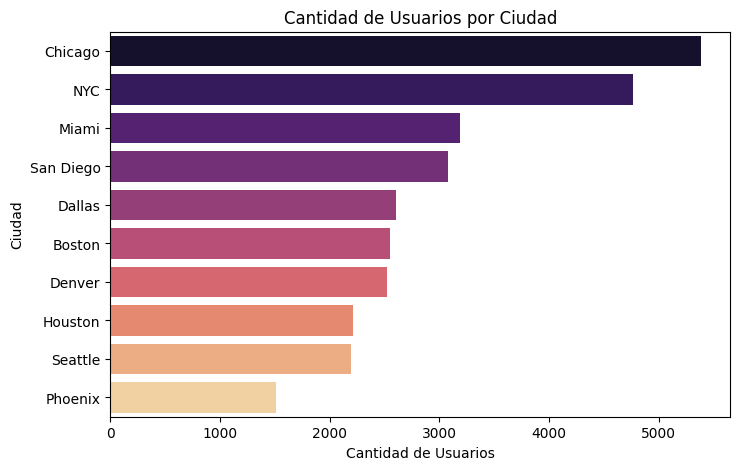

In [12]:
# Diagrama de barras que muestre la cantidad de personas que hay por ciudad 

plt.figure(figsize=(8,5))
sns.countplot(y=df_res['ciudad_residencia'], order=df_res['ciudad_residencia'].value_counts().index, palette='magma')
plt.title('Cantidad de Usuarios por Ciudad')
plt.xlabel('Cantidad de Usuarios')
plt.ylabel('Ciudad')
plt.show()

Tras analizar ambos aspectos, seleccionamos la ciudad que no solo tiene más registros, sino que también presenta la menor cantidad de problemas de calidad de datos (en proporción). Esto permitirá realizar análisis más precisos y comparables, evitando sesgos derivados de la falta de información o de la necesidad de realizar demasiadas imputaciones.

> **Justificación final:**  
> La ciudad elegida para los siguientes análisis es aquella que combina un alto volumen de datos con la mejor calidad posible, minimizando la cantidad de valores nulos y atípicos. Así, garantizamos que los resultados obtenidos sean sólidos y útiles para la toma de decisiones futuras. La ciudad elegida fue **Chicago**

---------

#### Para esta primera parte, se buscó obtener la mayor cantidad de información preliminar importante que nos pueda servir en futuros análisis. 

Lo más relevante fue:
- Conocer el número de filas y columnas existentes.
- Clasificar las columnas en función de sus valores para saber qué herramientas utilizar.
- Analizar las primeras filas para detectar posibles correlaciones.
- Revisar los datos estadísticos, que son muy valiosos en esta etapa.

Además, se planea mejorar la exploración con la generación de gráficos y la implementación de nuevas funciones que permitan obtener información más detallada.

#### **Resumen de la exploración inicial de los datos**

En esta primera etapa se buscó obtener la mayor cantidad de información preliminar relevante para futuros análisis. Los principales enfoques fueron:

- **Dimensión del DataFrame:** 30,000 filas y 17 columnas.
- **Tipos de columnas:** 12 categóricas y 5 numéricas.
- **Correlaciones observadas:** Existe una posible relación entre el estrato social y el número de visitas al restaurante.
- **Datos faltantes:** Se detectaron valores nulos en columnas clave como edad, promedio de gasto en comida y preferencias alimenticias. Las columnas de teléfono y correo electrónico presentan más de la mitad de sus valores faltantes, por lo que será necesario planear una estrategia de imputación o decidir si se dejan tal cual.
- **Datos fuera de rango:** Se identificaron valores atípicos, por ejemplo, edades y frecuencias de visita negativas.
- **Duplicados:** Se observó que un correo electrónico se repite 4 veces, lo que podría indicar errores o duplicados.
- **Tipos de datos incorrectos:** Hay columnas cuyo tipo de dato no corresponde a su contenido, lo que puede provocar errores en el análisis.
- **Columnas fusionables o eliminables:** Existen columnas que podrían fusionarse o eliminarse sin afectar el análisis, pero se debe tener precaución para evitar consecuencias negativas en el futuro.
- **Valores extremos:** La columna de ingreso mensual presenta valores muy altos que podrían sesgar los análisis.
- **Valores en cero:** Es importante analizar si los ceros en la columna de frecuencia de visitas representan errores o simplemente falta de contexto, ya que están correlacionados con el promedio de gasto en comida y el estrato social.
- **Columnas irrelevantes:** Se deben revisar aquellas columnas que podrían no aportar valor al análisis.

#### **Próximos pasos**

El siguiente paso será la limpieza de los datos. Esto permitirá realizar análisis más profundos sobre tendencias y relaciones observadas, como la relación entre el estrato social y la frecuencia de visitas. Es fundamental abordar los datos faltantes y duplicados (por ejemplo, correos electrónicos repetidos), ya que su presencia puede afectar la calidad y confiabilidad de los modelos y análisis posteriores. Se evaluará la mejor estrategia para eliminar, imputar o advertir sobre estos casos, minimizando el riesgo de estimaciones sesgadas.

-----------------

## Limpieza de datos

#### Identificación de valores nulos, duplicados y errores

Una vez realizado el proceso de análisis para detectar las principales anomalías, podemos comenzar a trabajar para corregir estos errores y obtener un DataFrame limpio, sin valores que puedan generar problemas en el futuro. En esta sección se realizará lo siguiente:

- **Resolver valores nulos y fuera de rango:** Se imputarán estos datos tomando en cuenta las posibles categorías que influyen en ellos, para evitar que alteren excesivamente los promedios generales.
- **Identificar valores duplicados:** Se analizará si realmente existen duplicados para decidir la mejor estrategia: sustituirlos, eliminarlos o solo crear una advertencia.
- **Corregir tipos de variables:** Se cambiarán los tipos de variables en aquellas columnas cuyo tipo de dato no corresponda, evitando inconsistencias.
- **Unificar columnas irrelevantes separadas:** Se unirán columnas que no aportan valor de manera individual para simplificar el análisis.

------



----------
- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualizacion de relaciones](#visualizacion-de-relaciones-entre-variables-numericas-y-categoricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#conclusiones-del-proceso-de-exploracion-y-limpieza-de-datos)
-------------

### Unificación de columnas irrelevantes por separado

Comenzamos unificando aquellas columnas que no aportan valor de manera individual, facilitando así el manejo y análisis de los datos. En este caso, fusionamos las columnas de nombre y apellido en una sola columna llamada **nombre_completo**. Esta nueva columna se posiciona como la segunda del DataFrame para mantener el orden lógico de la información. Si en futuros análisis se requiere trabajar con nombre y apellido por separado, siempre es posible dividir nuevamente esta columna.

In [13]:
# Unificar los valores de nombre y apellido en una sola columna

df_res['nombre_completo'] = df_res['nombre'] + ' ' + df_res['apellido'] # concatenar nombre y apellido en una nueva columna
df_res.drop(columns=['nombre', 'apellido'], inplace=True) # eliminar las columnas originales de nombre y apellido

In [14]:
# Mover la columna 'nombre_completo' al principio del DataFrame

columnas = df_res.columns.tolist() # Obtener la lista de columnas
columnas.remove('nombre_completo') # Eliminar 'nombre_completo' de su posición actual
columnas.insert(1, 'nombre_completo')  # Insertar en el segundo lugar (posición 1)
df_res = df_res[columnas] # Reordenar el DataFrame con la nueva lista de columnas

In [15]:
df_res.head() # Muestra las primeras filas del DataFrame actualizado

,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson Gomez,31.0,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha Soto,40.0,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry Adams,62.0,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James Shannon,41.0,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan Jones,49.0,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350


### Una vez unificadas las columnas que resultaban irrelevantes por separado, pasamos a una de las partes más esenciales de la limpieza de datos: el tratamiento de valores nulos en nuestro DataFrame. 

Comenzamos con la columna **'edad'**, ya que fue una de las principales problemáticas detectadas. Aquí no solo se identificaron datos faltantes, sino también valores que resultan prácticamente imposibles. Por ello, primero segmentamos los valores permitidos definiendo un rango máximo y mínimo que consideramos realista. Posteriormente, los valores fuera de ese rango se reemplazan por la mediana, y los valores nulos se imputan utilizando la mediana agrupada por ciudad y estrato socioeconómico, para mantener la coherencia y evitar sesgos en los análisis posteriores.

Generamos un boxplot para visualizar la distribución de los valores en la columna **'edad'**. Este gráfico nos permite identificar fácilmente la presencia de outliers, valores atípicos y posibles errores de captura en los datos.

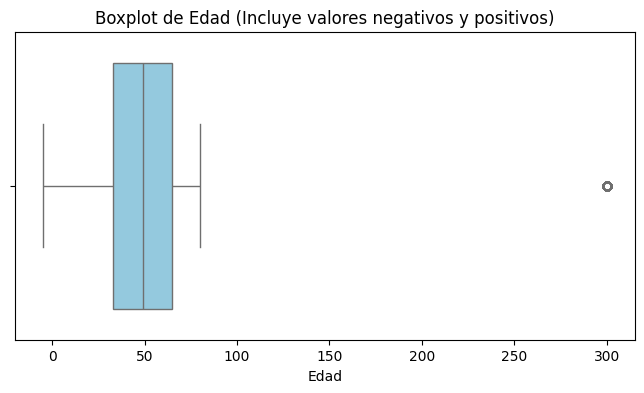

In [16]:
# Boxplot para visualizar todos los valores (positivos y negativos) de la columna 'edad'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_res['edad'], color='skyblue')
plt.title('Boxplot de Edad (Incluye valores negativos y positivos)')
plt.xlabel('Edad')
plt.show()

Pasamos a corregir los valores que estén fuera de rango, definiendo como límites aceptables entre 18 y 90 años. Elegimos este rango porque consideramos que es el más realista para nuestro análisis (el mínimo de 18 evita problemas relacionados con datos de menores de edad). Una vez segmentados, los valores fuera de este rango se reemplazan por la mediana de la columna, ya que la mediana es menos sensible a los valores extremos que la media y ayuda a mantener la coherencia de los datos.

In [17]:
# Análisis y tratamiento de valores nulos y fuera de rango en la columna 'edad'

# Definir el rango permitido
min_edad = 18
max_edad = 90

# Filtrar los valores fuera de rango
fuera_rango = df_res[(df_res['edad'] < min_edad) | (df_res['edad'] > max_edad)] # Filtra filas donde la edad está fuera del rango permitido 

# Mostrar como lista de diccionarios (o puedes usar .to_dict('records') para lista de filas)
fuera_rango_list = fuera_rango[['id_persona', 'edad']].to_dict('records') # Convertir a lista de diccionarios con solo las columnas relevantes
len(fuera_rango_list) # Muestra la cantidad de registros fuera de rango 

207

In [18]:
# Corregir valores fuera de rango en edad

df_res.loc[ # .loc permite seleccionar filas y columnas por etiquetas 
    (df_res['edad'] > 90) | (df_res['edad'] < 18), 'edad'    # corregir valores fuera de rango en edad
    ] = df_res['edad'].median() # reemplazar por la mediana 

df_res.describe() # Verificar si se aplicó el cambio correctamente, revisando minimo, máximo y media de la columna 'edad' 

,id_persona,edad,frecuencia_visita,promedio_gasto_comida,ingresos_mensuales
count,3.000000e+04,29899.000000,30000.000000,29855.000000,30000.000000
mean,5.504765e+09,48.916753,3.896133,32.603452,5389.755867
std,2.602799e+09,18.097158,2.741532,26.402601,4538.491728
min,1.000153e+09,18.000000,-3.000000,0.000000,800.000000
25%,3.243617e+09,33.000000,2.000000,13.290000,1860.000000
50%,5.515865e+09,49.000000,4.000000,25.510000,3402.000000
75%,7.754426e+09,64.000000,5.000000,44.400000,7761.000000
max,9.999627e+09,80.000000,10.000000,149.970000,17999.000000


Habiendo corregido estos datos, ahora procedemos a reemplazar los valores nulos o faltantes en la columna 'edad'. Para hacerlo de manera más precisa, utilizamos la mediana calculada agrupando por ciudad de residencia y estrato socioeconómico, lo que permite mantener la coherencia y reducir sesgos en los datos. Para esta tarea, utilizamos la función personalizada **imputar**

In [19]:
# Imputar valores nulos en la columna 'edad' usando la función imputar

edad_nulos = imputar(
    df_res,
    objetivo='edad',
    operacion='nulo', # Que se quiere tratar
    filtro1='ciudad_residencia', # Filtro por ciudad de residencia
    filtro2='estrato_socioeconomico', # Filtro por estrato social
    tc='mediana' # Tipo de cálculo, en este caso la mediana
)

df_res.info() # Verificar si se aplicó el cambio correctamente, revisando si hay valores nulos en la columna 'edad'

Antes
Tabla de frecuencia de edad:
edad
18.0    457
19.0    484
20.0    449
21.0    464
22.0    459
       ... 
76.0    479
77.0    509
78.0    444
79.0    487
80.0    483
Name: count, Length: 63, dtype: int64
Imputación de edad con nulo por ciudad_residencia y estrato_socioeconomico usando mediana completada.
--------------------
Después
Tabla de frecuencia de edad:
edad
18.0    457
19.0    484
20.0    449
21.0    464
22.0    459
       ... 
76.0    479
77.0    509
78.0    444
79.0    487
80.0    483
Name: count, Length: 63, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre_completo            30000 non-null  object 
 2   edad                       30000 non-null  float64
 3   genero                     30000 non-null  object 
 4   ciuda

Finalmente, cambiamos el tipo de dato de la columna 'edad' a entero para asegurar la consistencia en el DataFrame y evitar posibles errores en análisis posteriores. Verificamos el cambio revisando la información del DataFrame.

In [20]:
# Cambiar tipo de dato de la edad a entero

df_res['edad'] = df_res['edad'].astype(int) # Convertir la columna 'edad' a tipo entero
df_res.info() # Verificar si se aplicó el cambio correctamente, revisando el tipo de dato de la columna 'edad'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre_completo            30000 non-null  object 
 2   edad                       30000 non-null  int64  
 3   genero                     30000 non-null  object 
 4   ciudad_residencia          30000 non-null  object 
 5   estrato_socioeconomico     30000 non-null  object 
 6   frecuencia_visita          30000 non-null  int64  
 7   promedio_gasto_comida      29855 non-null  float64
 8   ocio                       30000 non-null  object 
 9   consume_licor              30000 non-null  object 
 10  preferencias_alimenticias  28597 non-null  object 
 11  membresia_premium          30000 non-null  object 
 12  telefono_contacto          14834 non-null  object 
 13  correo_electronico         14928 non-null  obj

### Una vez solucionados los problemas de la columna 'edad', continuamos con la limpieza de la columna 'frecuencia_visita'. Esta columna también presenta valores fuera de rango, por lo que es necesario aplicar un tratamiento similar: identificaremos y corregiremos los valores atípicos, pero utilizando criterios y filtros específicos para esta variable

Primero, realizamos un análisis exploratorio sobre los valores fuera de rango en la columna **'frecuencia_visita'**. Durante la revisión preliminar, identificamos la presencia de valores negativos, en particular el valor **-3**. Es fundamental analizar cómo tratar estos casos para definir la mejor estrategia de corrección y así evitar sesgos en los resultados finales.

A continuación, generamos una tabla de frecuencia para visualizar la distribución de los valores en la columna **'frecuencia_visita'**. Esto nos permite identificar rápidamente la cantidad de registros para cada valor posible y detectar la presencia de valores atípicos o fuera de rango.


In [21]:
# Tabla de frecuencia para los valores de la columna 'frecuencia_visita'
frecuencia_tabla = df_res['frecuencia_visita'].value_counts().sort_index()
print("Tabla de frecuencia de 'frecuencia_visita':")
print(frecuencia_tabla)

Tabla de frecuencia de 'frecuencia_visita':
frecuencia_visita
-3     1547
 0     1463
 1     1459
 2     3659
 3     3697
 4     5042
 5     5932
 6     3746
 7      878
 8      862
 9      839
 10     876
Name: count, dtype: int64


Para identificar posibles conexiones entre valores negativos en las columnas **'frecuencia_visita'** y **'promedio_gasto_comida'**, revisamos cuántos registros presentan valores menores a cero en cada una. Esto ayuda a detectar errores de captura o inconsistencias que puedan afectar el análisis.


In [22]:
# Revisamos el número de valores negativos en las columnas 'frecuencia_visita' y 'promedio_gasto_comida' para identificar conexiones con otros datos

print("Valores negativos por columna:")
for col in ['frecuencia_visita', 'promedio_gasto_comida']:
    negativos = df_res[df_res[col] < 0]
    print(f"{col}: {len(negativos)} valores negativos")

Valores negativos por columna:
frecuencia_visita: 1547 valores negativos
promedio_gasto_comida: 0 valores negativos


Para analizar el impacto de reemplazar los valores negativos por su valor absoluto (por ejemplo, cambiar -3 a 3) en la columna **'frecuencia_visita'**, revisamos cuántos registros tienen exactamente el valor 3 tanto en **'frecuencia_visita'** como en **'promedio_gasto_comida'**. Esto permite dimensionar el posible sesgo que se introduciría al realizar este cambio.


In [23]:
# Revisamos valores igual a 3 en el campo 'frecuencia_visita' para identificar si, en caso de utilizar el valor absoluto de 3, que tanto afectaría a los datos

print("Valores negativos por columna:")
for col in ['frecuencia_visita', 'promedio_gasto_comida']:
    negativos = df_res[df_res[col] == 3]
    print(f"{col}: {len(negativos)} tres")

Valores negativos por columna:
frecuencia_visita: 3697 tres
promedio_gasto_comida: 0 tres


Para profundizar en el análisis de los valores negativos en **'frecuencia_visita'**, revisamos si estos se concentran en ciertas ciudades o estratos socioeconómicos. Esto ayuda a identificar patrones o posibles problemas de captura de datos en segmentos específicos.

In [24]:
# Analizamos si los negativos se concentran en ciertas ciudades, estratos o personas 

print("\nDistribución de negativos por ciudad (frecuencia_visita):")
print(df_res[df_res['frecuencia_visita'] < 0]['ciudad_residencia'].value_counts())

print("\nDistribución de negativos por estrato (frecuencia_visita):")
print(df_res[df_res['frecuencia_visita'] < 0]['estrato_socioeconomico'].value_counts())


Distribución de negativos por ciudad (frecuencia_visita):
ciudad_residencia
Chicago      286
NYC          264
Miami        173
San Diego    164
Dallas       128
Boston       123
Denver       115
Seattle      114
Houston      110
Phoenix       70
Name: count, dtype: int64

Distribución de negativos por estrato (frecuencia_visita):
estrato_socioeconomico
Medio       500
Alto        469
Bajo        308
Muy Alto    270
Name: count, dtype: int64


Para analizar si existe relación entre los valores negativos en **'frecuencia_visita'** y otras variables como **edad** e **ingresos mensuales**, se muestran las estadísticas descriptivas de ambas columnas solo para los registros con valores negativos en 'frecuencia_visita'. Esto permite identificar si estos casos se concentran en ciertos rangos de edad o niveles de ingreso, lo que podría indicar patrones de captura o sesgos en segmentos específicos de la población.


In [25]:
# Ver si hay relación con otras columnas (por ejemplo, edad, ingresos)

print("\nEstadísticas de edad para negativos en frecuencia_visita:")
print(df_res[df_res['frecuencia_visita'] < 0]['edad'].describe())


Estadísticas de edad para negativos en frecuencia_visita:
count    1547.000000
mean       48.142211
std        18.064437
min        18.000000
25%        33.000000
50%        48.000000
75%        64.000000
max        80.000000
Name: edad, dtype: float64


Luego de analizar los datos y comparar los registros con valores negativos en **'frecuencia_visita'** respecto a otras columnas como edad e ingresos, observamos que reemplazar los negativos por su valor absoluto podría concentrar los datos en un solo valor y generar sesgos importantes. Por ello, optamos por una estrategia más robusta: imputar estos valores utilizando la media segmentada por estrato socioeconómico y ciudad de residencia. Esta decisión permite mantener la diversidad y representatividad de los datos, reduciendo el riesgo de distorsionar los análisis posteriores. Para ello, utilizamos la función personalizada **imputar**.

In [26]:
# Función para imputar los valores negativos en 'frecuencia_visita' utilizando la media por ciudad y estrato socioeconómico

frec_negativos = imputar(
    
    df_res, 
    objetivo='frecuencia_visita', 
    operacion='negativo', 
    filtro1='ciudad_residencia', 
    filtro2='estrato_socioeconomico', 
    tc='media'
)
df_res['frecuencia_visita'] = df_res['frecuencia_visita'].astype(int)  # Asegurarse de que la columna sea de tipo entero

Antes
Tabla de frecuencia de frecuencia_visita:
frecuencia_visita
-3     1547
 0     1463
 1     1459
 2     3659
 3     3697
 4     5042
 5     5932
 6     3746
 7      878
 8      862
 9      839
 10     876
Name: count, dtype: int64
Imputación de frecuencia_visita con negativo por ciudad_residencia y estrato_socioeconomico usando media completada.
--------------------
Después
Tabla de frecuencia de frecuencia_visita:
frecuencia_visita
0.000000     1463
1.000000     1459
1.446927       30
1.454800       61
1.469428       19
1.480000       16
1.510101       31
1.516159       65
1.521348       19
1.533493       27
1.533679       20
1.610309       20
2.000000     3659
3.000000     3697
3.425862       33
3.434302       41
3.441354       36
3.445887       36
3.454418       43
3.506739       41
3.516340       23
3.516791      107
3.542416       44
3.563455       96
4.000000     5042
4.953028       39
4.993094       35
5.000000     5932
5.002730       60
5.005650       28
5.010446       75


c:\Users\mfyz1\OneDrive\Escritorio\ProyectoM1_Maria_Fernanda_Yañez_Zavala - copia\mega_funcion.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[5.01903367 7.58283133 5.01903367 ... 3.42586207 4.99309392 5.00564972]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[objetivo] < 0, objetivo] = df.loc[df[objetivo] < 0, "media_segmentada"]


Una vez corregidos los valores negativos, observamos una correlación directa entre la columna **'frecuencia_visita'** y **'promedio_gasto_comida'**: cuando la frecuencia es 0, el gasto también es 0, y ambos casos suelen estar asociados a ciertos estratos socioeconómicos. Esto indica que imputar estos valores podría introducir inconsistencias y sesgos en los análisis posteriores. Por ello, es fundamental revisar cuidadosamente estos registros y definir una estrategia adecuada (como eliminar filas específicas o segmentar aún más el tratamiento) para asegurar la calidad y representatividad de los datos en los siguientes pasos del análisis.

Para confirmar la relación directa entre las columnas **'promedio_gasto_comida'** y **'frecuencia_visita'**, se calcula cuántos registros tienen el valor 0 en cada una. Esto permite verificar si ambos ceros coinciden y, por lo tanto, si representan el mismo grupo de usuarios en el análisis.


In [27]:
# calcular cuantos 0 hay en la columna promedio_gasto_comida y frecuencia_visita para confirmar que son iguales 

cantidad_0_promedio_gasto = df_res['promedio_gasto_comida'].value_counts().get(0, 0)
print("Cantidad de 0 en la columna promedio_gasto_comida:", cantidad_0_promedio_gasto)

cantidad_0_frecuencia_visita = df_res['frecuencia_visita'].value_counts().get(0, 0)
print("Cantidad de 0 en la columna frecuencia_visita:", cantidad_0_frecuencia_visita)

Cantidad de 0 en la columna promedio_gasto_comida: 1463
Cantidad de 0 en la columna frecuencia_visita: 1463


Dado que ambas columnas presentan una relación directa y la imputación podría generar sesgos importantes, se optó por eliminar las filas donde el estrato socioeconómico es **'bajo'** y tanto la **frecuencia de visita** como el **promedio de gasto en comida** son 0. Esta decisión ayuda a evitar inconsistencias y asegura que los análisis posteriores sean más representativos y confiables.

In [28]:
# Eliminar filas donde 'promedio_gasto_comida' o 'frecuencia_visita' sean 0, ya que no tienen sentido en el contexto del análisis

df_res = df_res[(df_res['promedio_gasto_comida'] != 0) & (df_res['frecuencia_visita'] != 0)] # Filtra el DataFrame para eliminar filas con 0 en las columnas especificadas

df_res.describe(include='all') # Verificar si se aplicó el cambio correctamente, revisando las estadísticas descriptivas de todas las columnas

,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
count,2.853700e+04,28537,28537.000000,28537,28537,28537,28537.000000,28392.000000,28537,28537,27191,28537,14083,14183,28537,28537.000000
unique,NaN,24415,NaN,2,10,4,NaN,NaN,2,2,6,2,14083,13769,4,NaN
top,NaN,David Williams,NaN,Femenino,Chicago,Medio,NaN,NaN,No,Sí,Carnes,No,(830)220-1926,kjones@example.org,Efectivo,NaN
freq,NaN,11,NaN,14283,5123,9325,NaN,NaN,14350,17587,7508,15697,1,3,11252,NaN
mean,5.508510e+09,NaN,48.855801,NaN,NaN,NaN,4.467674,34.283462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5604.482917
std,2.603988e+09,NaN,18.080383,NaN,NaN,NaN,2.104973,25.988853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4550.343403
min,1.000153e+09,NaN,18.000000,NaN,NaN,NaN,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000
25%,3.249536e+09,NaN,33.000000,NaN,NaN,NaN,3.000000,14.517500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2099.000000
50%,5.516035e+09,NaN,49.000000,NaN,NaN,NaN,4.000000,27.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3659.000000
75%,7.762721e+09,NaN,64.000000,NaN,NaN,NaN,6.000000,45.780000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7967.000000


Es importante cambiar el tipo de dato de la columna **'frecuencia_visita'** a entero, ya que esto garantiza la consistencia del DataFrame y evita posibles errores en análisis posteriores. Además, trabajar con el tipo de dato correcto facilita la aplicación de funciones estadísticas y mejora la interpretación de los resultados.

In [29]:
# Cambio de tipo de dato en la columna frecuencia_visita a entero

df_res['frecuencia_visita'] = df_res['frecuencia_visita'].astype(int) # convertir frecuencia_visita a entero
df_res.info() # Verificar el cambio de tipo de dato

<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 non-null  int64  
 3   genero                     28537 non-null  object 
 4   ciudad_residencia          28537 non-null  object 
 5   estrato_socioeconomico     28537 non-null  object 
 6   frecuencia_visita          28537 non-null  int64  
 7   promedio_gasto_comida      28392 non-null  float64
 8   ocio                       28537 non-null  object 
 9   consume_licor              28537 non-null  object 
 10  preferencias_alimenticias  27191 non-null  object 
 11  membresia_premium          28537 non-null  object 
 12  telefono_contacto          14083 non-null  object 
 13  correo_electronico         14183 non-null  object 


C:\Users\mfyz1\AppData\Local\Temp\ipykernel_11836\1403707214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['frecuencia_visita'] = df_res['frecuencia_visita'].astype(int) # convertir frecuencia_visita a entero


### Una vez finalizado el tratamiento de las columnas anteriores, es fundamental aplicar un proceso similar en la columna **'promedio_gasto_comida'**, ya que también puede presentar valores nulos, fuera de rango o inconsistentes. A continuación, se procede a identificar y corregir estos problemas para asegurar la calidad y coherencia de los datos en todo el DataFrame.

El primer paso es imputar los valores nulos en la columna **'promedio_gasto_comida'**. Para lograr una imputación más precisa y representativa, se utiliza la media segmentada por **estrato socioeconómico** y **ciudad de residencia**. De esta manera, los valores asignados reflejan mejor el contexto de cada grupo y se minimiza el riesgo de distorsionar los resultados del análisis.

In [30]:
# Imputar valores nulos en la columna 'promedio_gasto_comida' usando la función imputar

prom_nulos = imputar(
    df_res,
    objetivo='promedio_gasto_comida',
    operacion='nulo', # Que se quiere tratar
    filtro1='ciudad_residencia', # Filtro por ciudad de residencia
    filtro2='estrato_socioeconomico', # Filtro por estrato social
    tc='media' # Tipo de cálculo, en este caso la media
)

# Redondear la columna a 2 decimales
df_res["promedio_gasto_comida"] = df_res["promedio_gasto_comida"].round(2)

df_res.info() # Verificar si se aplicó el cambio correctamente, revisando si hay valores nulos en la columna 'promedio_gasto_comida'

Antes
Tabla de frecuencia de promedio_gasto_comida:
promedio_gasto_comida
5.00      1
5.01      5
5.02      5
5.04      4
5.05      1
         ..
148.51    1
149.68    1
149.73    1
149.89    1
149.97    1
Name: count, Length: 8185, dtype: int64
Imputación de promedio_gasto_comida con nulo por ciudad_residencia y estrato_socioeconomico usando media completada.
--------------------
Después
Tabla de frecuencia de promedio_gasto_comida:
promedio_gasto_comida
5.00      1
5.01      5
5.02      5
5.04      4
5.05      1
         ..
148.51    1
149.68    1
149.73    1
149.89    1
149.97    1
Name: count, Length: 8221, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 no

c:\Users\mfyz1\OneDrive\Escritorio\ProyectoM1_Maria_Fernanda_Yañez_Zavala - copia\mega_funcion.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["media_segmentada"] = (
c:\Users\mfyz1\OneDrive\Escritorio\ProyectoM1_Maria_Fernanda_Yañez_Zavala - copia\mega_funcion.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="media_segmentada", inplace=True)
C:\Users\mfyz1\AppData\Local\Temp\ipykernel_11836\3849127081.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

### Continuamos con el tratamiento de valores nulos, enfocándonos ahora en la columna **'preferencias_alimenticias'**, que presenta menos problemáticas. Al igual que en los procedimientos anteriores, imputaremos los valores faltantes utilizando la **moda** segmentada por ciudad y estrato socioeconómico. Esta estrategia permite asignar el valor más frecuente dentro de cada grupo, asegurando mayor coherencia y representatividad en los datos.

Para ello, primero es útil revisar los valores únicos presentes en la columna **'preferencias_alimenticias'**. Esto nos permite conocer las subcategorías existentes y asegurarnos de que la imputación se realice correctamente, respetando la diversidad de opciones dentro de cada ciudad y estrato socioeconómico.

In [31]:
# Mostrar conteo de valores únicos en la columna 'preferencias_alimenticias'

conteo_valores = df_res['preferencias_alimenticias'].value_counts() # contar valores únicos en la columna preferencias_alimenticias
print("Conteo de valores únicos en preferencias_alimenticias:")
print(conteo_valores)

Conteo de valores únicos en preferencias_alimenticias:
preferencias_alimenticias
Carnes         7508
Vegetariano    6271
Mariscos       4966
Vegano         3105
Pescado        2831
Otro           2510
Name: count, dtype: int64


Una vez identificadas estas subcategorías, procedemos a imputar los valores faltantes utilizando la **moda** de la columna, segmentando por ciudad y estrato socioeconómico. Para ello, empleamos la función personalizada `imputar` que ya hemos importado previamente.

In [32]:
# Imputar valores nulos en la columna 'preferencias_alimenticias' usando la función imputar

alimntos_nulos = imputar(
    df_res,
    objetivo='preferencias_alimenticias', # Columna a tratar
    operacion='nulo', # Que se quiere tratar
    filtro1='ciudad_residencia', # Filtro por ciudad de residencia
    filtro2='estrato_socioeconomico', # Filtro por estrato social
    tc='moda' # Tipo de cálculo, en este caso la moda
)

df_res.info() # Verificar si se aplicó el cambio correctamente, revisando si hay valores nulos en la columna 'preferencias_alimenticias'

Antes
Tabla de frecuencia de preferencias_alimenticias:
preferencias_alimenticias
Carnes         7508
Mariscos       4966
Otro           2510
Pescado        2831
Vegano         3105
Vegetariano    6271
Name: count, dtype: int64
Imputación de preferencias_alimenticias con nulo por ciudad_residencia y estrato_socioeconomico usando moda completada.
--------------------
Después
Tabla de frecuencia de preferencias_alimenticias:
preferencias_alimenticias
Carnes         8345
Mariscos       5109
Otro           2510
Pescado        2831
Vegano         3105
Vegetariano    6637
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 non-null  int64  
 3   genero      

c:\Users\mfyz1\OneDrive\Escritorio\ProyectoM1_Maria_Fernanda_Yañez_Zavala - copia\mega_funcion.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["moda_segmentada"] = (
c:\Users\mfyz1\OneDrive\Escritorio\ProyectoM1_Maria_Fernanda_Yañez_Zavala - copia\mega_funcion.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="moda_segmentada", inplace=True)


### Para finalizar con la imputación de valores faltantes, nos enfocamos en las columnas **'telefono_contacto'** y **'correo_electronico'**. Debido a la gran cantidad de datos faltantes en ambas, la decisión más adecuada sería dejarlas tal cual están para evitar introducir información poco representativa.

### Sin embargo, por fines educativos, decidimos imputar los valores nulos con 'No Aplica'. Dado que el DataFrame no es muy grande, esta acción no representa una carga significativa, aunque en un contexto real es preferible no aplicar ningún tratamiento en estos casos.

Imputamos la columna **'telefono_contacto'** con el valor `'No_aplica'` para todos aquellos registros que presentan datos faltantes. Esto se realiza únicamente con fines educativos, ya que en un entorno profesional lo más recomendable sería dejar los valores nulos para evitar introducir información poco representativa.

In [33]:
# Imputación de valores faltantes en las columnas 'telefono_contacto' con 'No Aplica' 

df_res['telefono_contacto'] = df_res['telefono_contacto'].fillna('No_aplica') # Imputar nulos en telefono_contacto con 'No Aplica' 
df_res.info()
df_res.describe(include='all')

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_11836\1399534358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['telefono_contacto'] = df_res['telefono_contacto'].fillna('No_aplica') # Imputar nulos en telefono_contacto con 'No Aplica'


<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 non-null  int64  
 3   genero                     28537 non-null  object 
 4   ciudad_residencia          28537 non-null  object 
 5   estrato_socioeconomico     28537 non-null  object 
 6   frecuencia_visita          28537 non-null  int64  
 7   promedio_gasto_comida      28537 non-null  float64
 8   ocio                       28537 non-null  object 
 9   consume_licor              28537 non-null  object 
 10  preferencias_alimenticias  28537 non-null  object 
 11  membresia_premium          28537 non-null  object 
 12  telefono_contacto          28537 non-null  object 
 13  correo_electronico         14183 non-null  object 


,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
count,2.853700e+04,28537,28537.000000,28537,28537,28537,28537.000000,28537.000000,28537,28537,28537,28537,28537,14183,28537,28537.000000
unique,NaN,24415,NaN,2,10,4,NaN,NaN,2,2,6,2,14084,13769,4,NaN
top,NaN,David Williams,NaN,Femenino,Chicago,Medio,NaN,NaN,No,Sí,Carnes,No,No_aplica,kjones@example.org,Efectivo,NaN
freq,NaN,11,NaN,14283,5123,9325,NaN,NaN,14350,17587,8345,15697,14454,3,11252,NaN
mean,5.508510e+09,NaN,48.855801,NaN,NaN,NaN,4.467674,34.275907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5604.482917
std,2.603988e+09,NaN,18.080383,NaN,NaN,NaN,2.104973,25.948466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4550.343403
min,1.000153e+09,NaN,18.000000,NaN,NaN,NaN,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000
25%,3.249536e+09,NaN,33.000000,NaN,NaN,NaN,3.000000,14.540000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2099.000000
50%,5.516035e+09,NaN,49.000000,NaN,NaN,NaN,4.000000,27.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3659.000000
75%,7.762721e+09,NaN,64.000000,NaN,NaN,NaN,6.000000,45.710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7967.000000


Al igual que con el número de teléfono, rellenamos los valores nulos con `'No_aplica'` en la columna **'correo_electronico'**. Esto también se realiza solo con fines educativos, ya que lo más recomendable en un entorno profesional sería dejar los valores nulos para no introducir información artificial.

In [34]:
# Imputación de valores faltantes en las columnas 'correo_electronico' con 'No Aplica'

df_res['correo_electronico'] = df_res['correo_electronico'].fillna('No_aplica') # Imputar nulos en correo_electronico con 'No Aplica'
df_res.info()
df_res.describe(include='all')
df_res 

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_11836\3440519818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['correo_electronico'] = df_res['correo_electronico'].fillna('No_aplica') # Imputar nulos en correo_electronico con 'No Aplica'


<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 non-null  int64  
 3   genero                     28537 non-null  object 
 4   ciudad_residencia          28537 non-null  object 
 5   estrato_socioeconomico     28537 non-null  object 
 6   frecuencia_visita          28537 non-null  int64  
 7   promedio_gasto_comida      28537 non-null  float64
 8   ocio                       28537 non-null  object 
 9   consume_licor              28537 non-null  object 
 10  preferencias_alimenticias  28537 non-null  object 
 11  membresia_premium          28537 non-null  object 
 12  telefono_contacto          28537 non-null  object 
 13  correo_electronico         28537 non-null  object 


,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson Gomez,31,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,No_aplica,Efectivo,6425
1,9446112038,Samantha Soto,40,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,No_aplica,Efectivo,2374
2,3098363243,Terry Adams,62,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,No_aplica,diana74@example.net,Efectivo,1110
3,4013002847,James Shannon,41,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,No_aplica,scottfrey@example.com,Tarjeta,6931
5,1291749568,Donna Davis,26,Femenino,Dallas,Alto,6,52.47,No,Sí,Carnes,Sí,976.606.6259x578,daniel28@example.com,Efectivo,8545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4862097674,Robert Cortez,20,Masculino,Houston,Alto,5,30.82,Sí,Sí,Vegano,Sí,No_aplica,garciagregory@example.net,Tarjeta,5781
29996,9458262482,Michael Holt,78,Masculino,Denver,Alto,5,45.04,No,No,Mariscos,No,No_aplica,jimmy77@example.org,Efectivo,7652
29997,3412365931,Rebecca Henry,77,Femenino,San Diego,Muy Alto,7,93.55,No,Sí,Mariscos,Sí,No_aplica,No_aplica,Efectivo,12639
29998,8853079811,Tamara Griffin,77,Femenino,Chicago,Bajo,1,6.18,Sí,No,Otro,No,(243)658-6543x11668,No_aplica,Tarjeta,1057


Después, generamos una lista que muestra cada correo electrónico y su frecuencia de aparición en la columna, ya que en el análisis preliminar se detectó la posible existencia de valores duplicados. A continuación, mostramos los primeros 1000 valores más frecuentes.

In [35]:
# Detectar duplicados en la columna 'correo_electronico' y mostrar su frecuencia 

frecuencia_duplicados = df_res['correo_electronico'].value_counts().head(1000)
print("Frecuencia de cada valor en la columna correo_electronico:")
print(frecuencia_duplicados)

Frecuencia de cada valor en la columna correo_electronico:
correo_electronico
No_aplica                    14354
ksmith@example.com               3
rdavis@example.org               3
omorales@example.net             3
christopher19@example.org        3
                             ...  
pkennedy@example.org             1
xsanders@example.org             1
brett19@example.com              1
lauren84@example.com             1
justin81@example.net             1
Name: count, Length: 1000, dtype: int64


Para identificar si existen registros duplicados en la columna `id_persona`, utilizamos el siguiente código. Esto permite detectar posibles errores de captura o registros repetidos en la base de datos:

In [36]:
# Encontrar ids duplicados en la columna id_persona

id_ducplicado = df_res['id_persona'][df_res['id_persona'].duplicated()] # encontrar ids duplicados 
print("IDs duplicados encontrados:", id_ducplicado.tolist()) # imprimir los ids duplicados como lista

IDs duplicados encontrados: []


Se realizó un análisis para identificar correos electrónicos duplicados. Dado que es posible que diferentes personas compartan el mismo correo (por ejemplo, familiares o cuentas compartidas), y considerando que más de la mitad de los registros presentan esta situación, se decidió no eliminar ni modificar estos datos para evitar la pérdida de información relevante. Sin embargo, se deja una pauta para que el equipo de marketing pueda revisar los ID de las personas que comparten el mismo correo electrónico y, si lo consideran necesario, realizar un análisis más detallado o tomar acciones específicas en función de sus objetivos.

In [37]:
# Filtrar los correos electrónicos que aparecen más de una vez
duplicados = df_res[(df_res.duplicated(subset='correo_electronico', keep=False)) & (df_res['correo_electronico'] != 'No_aplica')] # Filtrar los correos electrónicos duplicados, excluyendo 'No_aplica'

# Ordenar para facilitar la revisión visual
duplicados = duplicados.sort_values('correo_electronico')

# Mostrar solo las columnas relevantes
display(duplicados[['correo_electronico', 'nombre_completo', 'id_persona']])

,correo_electronico,nombre_completo,id_persona
25630,alicia33@example.net,John Conley,4584144878
7330,alicia33@example.net,Katherine Berry,4642197907
22212,alopez@example.com,Cameron Orr,5738967614
12254,alopez@example.com,Mason Miller,7137748626
7114,amanda50@example.com,Tasha Taylor,5455242170
...,...,...,...
6180,zthompson@example.org,Michael Davenport,1987243526
12232,zvasquez@example.org,Kathryn Ortiz,2036388089
5161,zvasquez@example.org,Nicole Thompson,6884723824
11594,zwilliams@example.org,Patricia Calhoun,8117478955


### Finalmente, se realiza el cambio de tipo de dato en la columna `ingresos_mensuales`, convirtiéndola de entero (`int`) a decimal (`float`). Esto permite una mayor precisión en los análisis financieros y facilita futuras operaciones estadísticas. Al final, se muestra la comprobación para verificar que el cambio se haya aplicado correctamente.

In [38]:
# Cambiar tipo de dato de la columna ingresos_mensuales a float

df_res["ingresos_mensuales"] = df_res["ingresos_mensuales"].astype(float) # Convertir la columna 'ingresos_mensuales' a tipo float

df_res.info()
df_res.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 non-null  int64  
 3   genero                     28537 non-null  object 
 4   ciudad_residencia          28537 non-null  object 
 5   estrato_socioeconomico     28537 non-null  object 
 6   frecuencia_visita          28537 non-null  int64  
 7   promedio_gasto_comida      28537 non-null  float64
 8   ocio                       28537 non-null  object 
 9   consume_licor              28537 non-null  object 
 10  preferencias_alimenticias  28537 non-null  object 
 11  membresia_premium          28537 non-null  object 
 12  telefono_contacto          28537 non-null  object 
 13  correo_electronico         28537 non-null  object 


C:\Users\mfyz1\AppData\Local\Temp\ipykernel_11836\3780646274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res["ingresos_mensuales"] = df_res["ingresos_mensuales"].astype(float) # Convertir la columna 'ingresos_mensuales' a tipo float


,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
count,2.853700e+04,28537,28537.000000,28537,28537,28537,28537.000000,28537.000000,28537,28537,28537,28537,28537,28537,28537,28537.000000
unique,NaN,24415,NaN,2,10,4,NaN,NaN,2,2,6,2,14084,13770,4,NaN
top,NaN,David Williams,NaN,Femenino,Chicago,Medio,NaN,NaN,No,Sí,Carnes,No,No_aplica,No_aplica,Efectivo,NaN
freq,NaN,11,NaN,14283,5123,9325,NaN,NaN,14350,17587,8345,15697,14454,14354,11252,NaN
mean,5.508510e+09,NaN,48.855801,NaN,NaN,NaN,4.467674,34.275907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5604.482917
std,2.603988e+09,NaN,18.080383,NaN,NaN,NaN,2.104973,25.948466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4550.343403
min,1.000153e+09,NaN,18.000000,NaN,NaN,NaN,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000
25%,3.249536e+09,NaN,33.000000,NaN,NaN,NaN,3.000000,14.540000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2099.000000
50%,5.516035e+09,NaN,49.000000,NaN,NaN,NaN,4.000000,27.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3659.000000
75%,7.762721e+09,NaN,64.000000,NaN,NaN,NaN,6.000000,45.710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7967.000000


## Visualizacion de relaciones entre variables numericas y categoricas

A continuación, exploramos algunas relaciones clave entre variables para identificar patrones útiles para el análisis posterior.

----------
- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualizacion de relaciones](#visualizacion-de-relaciones-entre-variables-numericas-y-categoricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#conclusiones-del-proceso-de-exploracion-y-limpieza-de-datos)
-------------

Creamos un **boxplot** para comparar la distribución de los ingresos mensuales según el estrato socioeconómico. Esta visualización facilita la identificación de diferencias, posibles outliers y la dispersión de los ingresos en cada grupo, permitiendo analizar cómo varían los ingresos entre los distintos estratos.

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_11836\801784486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_res, x='estrato_socioeconomico', y='ingresos_mensuales', palette='Set2')


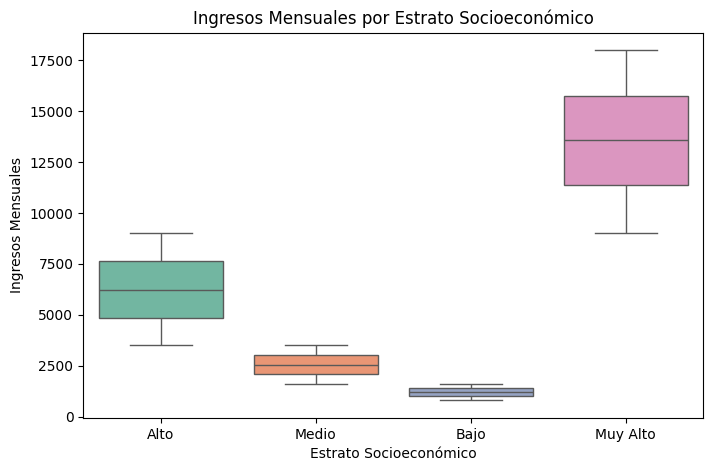

In [39]:
# Boxplot de ingresos mensuales por estrato socioeconómico
plt.figure(figsize=(8,5))
sns.boxplot(data=df_res, x='estrato_socioeconomico', y='ingresos_mensuales', palette='Set2')
plt.title('Ingresos Mensuales por Estrato Socioeconómico')
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Ingresos Mensuales')
plt.show()

También generamos un **gráfico de barras** para visualizar la distribución de las preferencias alimenticias entre los usuarios. Este gráfico permite identificar cuáles son las opciones más populares y detectar posibles tendencias o segmentos de interés dentro de la base de datos.

C:\Users\mfyz1\AppData\Local\Temp\ipykernel_11836\472144761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_res, x='preferencias_alimenticias', order=df_res['preferencias_alimenticias'].value_counts().index, palette='pastel')


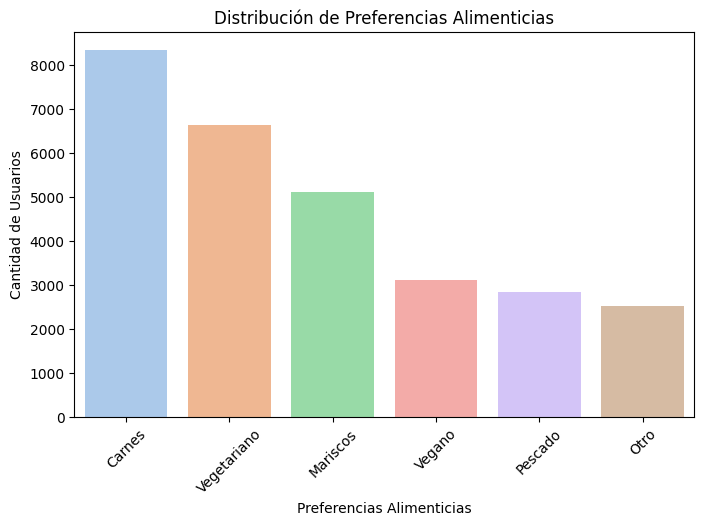

In [40]:
# Gráfico de barras de preferencias alimenticias

plt.figure(figsize=(8,5))
sns.countplot(data=df_res, x='preferencias_alimenticias', order=df_res['preferencias_alimenticias'].value_counts().index, palette='pastel')
plt.title('Distribución de Preferencias Alimenticias')
plt.xlabel('Preferencias Alimenticias')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)
plt.show()

También generamos un **gráfico de barras** para visualizar la distribución de las preferencias alimenticias entre los usuarios. Este gráfico permite identificar cuáles son las opciones más populares y detectar posibles tendencias o segmentos de interés dentro de la base de datos. Además, al analizar la distribución por ciudad, es posible observar si existen diferencias significativas en las preferencias alimenticias entre los usuarios de distintas localidades, lo que puede aportar información valiosa para estrategias de marketing segmentadas.

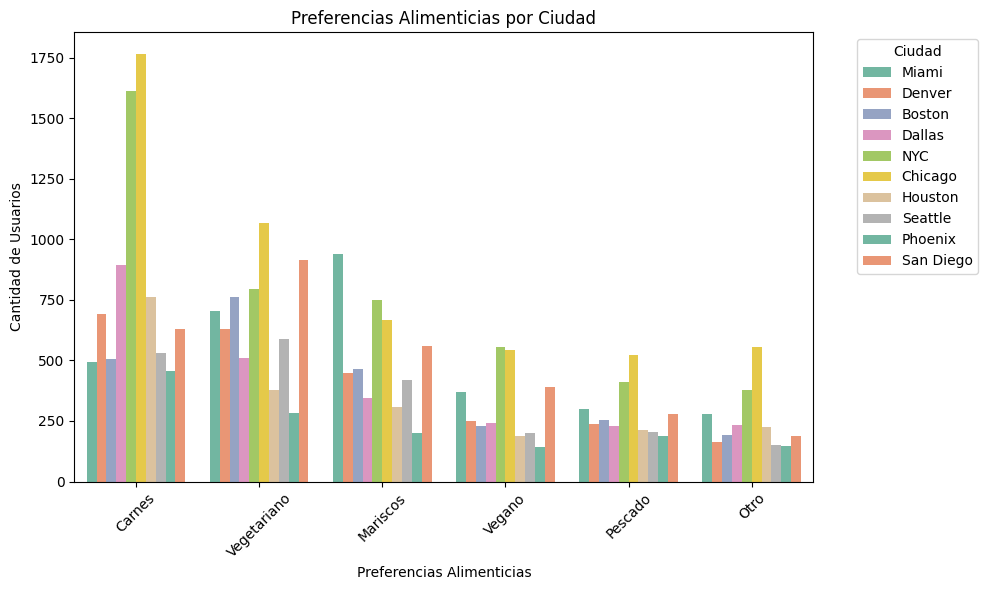

In [41]:
# Gráfico de barras agrupado por ciudad y preferencias alimenticias
plt.figure(figsize=(10,6))
sns.countplot(data=df_res, x='preferencias_alimenticias', hue='ciudad_residencia', order=df_res['preferencias_alimenticias'].value_counts().index, palette='Set2')
plt.title('Preferencias Alimenticias por Ciudad')
plt.xlabel('Preferencias Alimenticias')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)
plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

---

## Guardado de DataFrames Limpiados y Normalizados

Después de generar varias visualizaciones para detectar tendencias y patrones útiles para análisis futuros, procedemos a guardar los DataFrames resultantes, ya limpios y normalizados. Esta práctica garantiza que la información esté preparada para su reutilización en etapas posteriores del proyecto y facilita la continuidad del análisis de datos.

---

----------
- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualizacion de relaciones](#visualizacion-de-relaciones-entre-variables-numericas-y-categoricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#conclusiones-del-proceso-de-exploracion-y-limpieza-de-datos)
-------------

#### Guardar el DataFrame general limpio en un archivo CSV

Para conservar una copia de los datos ya limpios y listos para análisis posteriores, se exporta el DataFrame a un archivo CSV. Se utiliza el parámetro `index=False` para evitar que se guarde la columna de índices.

In [42]:
# Guardar el DataFrame limpio en un nuevo archivo CSV

df_res.to_csv("usuarios_limpios.csv", index=False) # Guardar sin el índice original 

#### Segmentación de los datos por ciudad

Para enfocar el análisis únicamente en los usuarios de la ciudad de Chicago, como se había planteado desde el inicio, se filtra el DataFrame conservando solo los registros donde la columna `ciudad_residencia` es igual a `'Chicago'`

In [43]:
# Segmentar los datos por la ciudad 'Chicago'

df_chi = df_res[df_res['ciudad_residencia'] == 'Chicago']

#### Exportar el DataFrame segmentado a un archivo CSV

Para guardar únicamente los datos de los usuarios de Chicago ya limpios y segmentados, se exporta el DataFrame a un archivo CSV. Se utiliza `index=False` para no incluir la columna de índices en el archivo final.

In [44]:
# Exportar el DataFrame limpio a un archivo CSV sin incluir el índice

df_chi.to_csv('Datos_usuarios_Chicago_limpios.csv', index=False) # Exportar el DataFrame limpio a un archivo CSV sin incluir el índice

## Conclusiones del proceso de exploracion y limpieza de datos

----------
- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualizacion de relaciones](#visualizacion-de-relaciones-entre-variables-numericas-y-categoricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#conclusiones-del-proceso-de-exploracion-y-limpieza-de-datos)
-------------

---

### **Resumen del Trabajo Realizado**

Este primer avance del proyecto integrador transformó un dataset inicial de **30,000 registros y 17 columnas** en una base de datos limpia y confiable. El proceso abarcó desde la exploración inicial hasta la corrección de inconsistencias, estableciendo las bases para análisis posteriores de segmentación de clientes.

### **Principales Problemas Resueltos**

#### **1. Calidad de los Datos**
- **Valores fuera de rango**: Se corrigieron edades negativas y superiores a 90 años, estableciendo límites realistas (18-90 años)
- **Datos negativos**: Los valores negativos en frecuencia de visitas se trataron mediante imputación segmentada por ciudad y estrato socioeconómico
- **Valores nulos**: Se implementó imputación contextualizada usando mediana para edad, media para gastos y moda para preferencias alimenticias

#### **2. Estructura y Consistencia**
- **Simplificación**: Se unificaron nombre y apellido en una sola columna
- **Tipos de datos**: Se estandarizaron los tipos (enteros para edad/frecuencia, float para ingresos)
- **Coherencia lógica**: Se eliminaron registros con patrones inconsistentes (frecuencia=0 y gasto=0)

#### **3. Selección Estratégica**
Chicago se eligió como ciudad foco basándose en dos criterios clave:
- **Volumen de datos**: Mayor cantidad de registros para análisis representativos
- **Calidad**: Menor proporción de valores nulos en variables críticas

### **Metodología Aplicada**

La estrategia de limpieza siguió principios claros:

1. **Imputación inteligente**: Segmentación por ciudad y estrato socioeconómico para mantener coherencia
2. **Preservación de relaciones**: Se mantuvieron correlaciones naturales entre variables (frecuencia-gasto)
3. **Documentación completa**: Cada transformación fue justificada y documentada
4. **Automatización**: Uso de función personalizada `imputar` para estandarizar procesos

### **Resultados Obtenidos**

El dataset final presenta:
- **Completitud**: Sin valores nulos en variables críticas
- **Consistencia**: Tipos de datos apropiados y rangos realistas
- **Enfoque**: Datos de Chicago listos para análisis específicos
- **Seguimiento**: Dos archivos generados (`usuarios_limpios.csv` completo y `Datos_usuarios_Chicago_limpios.csv` segmentado)

### **Valor para siguientes análisis**

Este trabajo proporciona:

1. **Base sólida**: Datos confiables para identificar patrones de comportamiento
2. **Eficiencia**: Estructura preparada para modelos de segmentación
3. **Confiabilidad**: Calidad que garantiza decisiones informadas
4. **Escalabilidad**: Dataset completo disponible para análisis comparativos

### **Próximos Pasos del Proyecto**

Los siguientes avances incluirán:
- **Análisis exploratorio avanzado** de correlaciones y tendencias en Chicago
- **Recolección de datos de restaurantes** de Chicago para complementar la información de usuarios
- **Modelo de recomendación** que integre datos de usuarios y restaurantes para sugerir establecimientos personalizados
- **Recomendaciones estratégicas** para campañas personalizadas basadas en preferencias y comportamientos

### **Lecciones Aprendidas**

Este proceso demostró la importancia de:
- Un análisis exploratorio detallado y con propósito antes de cualquier transformación
- Decisiones metodológicas basadas en el contexto del negocio
- Balance entre completitud de datos y representatividad
- Documentación clara para garantizar reproducibilidad

### **Reflexión Final**

La limpieza de datos no es solo una tarea técnica preliminar, sino una actividad estratégica que determina la calidad de todos los análisis posteriores. Este primer avance establece bases sólidas para que, en análisis posteriores, se puedan tomar decisiones informadas sobre segmentación de clientes.

El dataset limpio de Chicago representa ahora un activo valioso que se complementará en las siguientes fases con análisis más profundos y recomendaciones específicas para optimizar las campañas de marketing digital.

---

> **Nota**: Este primer avance constituye la base del proyecto integrador. Los insights específicos, patrones detallados y recomendaciones accionables se desarrollarán en los siguientes entregables, donde aplicaremos técnicas avanzadas sobre esta base de datos limpia y confiable.